In [5]:
import pandas as pd
from pandas import read_csv, DataFrame
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

C:\miniconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
df = pd.read_csv('base_entrainement_input_zeros.csv')

In [31]:
df.head(5)

,LBL_FAM,COD_FAM,LBL_GRP_V2,Rank_CA,Rank_Clients,Nb_magasins_N,Nb_magasins_N-1,Nb_clients_marque,Indice_Nb_clients_marque,CA_marque,...,Valeur_client_marque_vs_groupe_Etrangers,Ind_Del_moy_Marque_vs_sect_glob,Ind_Del_moy_Marque_vs_sect_moy,Valeur_client_marque_vs_global_total,Valeur_client_marque_vs_global_FR,Valeur_client_marque_vs_global_Etrangers,Tx_Fidelisation_marque_vs_global,Tx_Promo_marque_vs_global,Age_moyen_marque_vs_global,age_marque
0,GL TEXTILE,1350,Accessoires Homme,3,1,59,57.0,146757,109.529958,4443256.76,...,13.856967,99.108455,168.580053,144.533430,203.814911,41.073156,16.470830,128.969432,2.044260,2611
1,GL CRAVATE,3407,Accessoires Homme,21,2,58,57.0,36152,78.884549,830076.22,...,10.467468,76.485873,130.099823,147.047951,206.045940,31.026412,8.992712,161.211452,-2.622380,2611
2,GL MAROQUINERIE,5728,Accessoires Homme,7,3,59,57.0,32168,77.869765,1713811.44,...,17.985450,75.408607,128.267431,136.236121,188.391169,53.310311,5.095796,133.500450,-0.895100,2611
3,GL MAROQUINERIE 2,1344,Accessoires Homme,18,4,59,57.0,31807,145.876903,942943.14,...,18.465603,60.326885,102.613945,144.100232,199.311607,54.733522,4.708534,91.837756,1.265538,2611
4,RALPH LAUREN,2853,Accessoires Homme,11,5,58,57.0,30502,100.986624,1391503.39,...,18.177413,77.563138,131.932215,173.188462,242.159260,53.879304,8.309819,109.642122,-4.587896,2611


In [7]:
df = df.set_index(['LBL_FAM','COD_FAM','LBL_GRP_V2'])

In [8]:
df = df.fillna(0)

In [9]:
X = df.iloc[:,:].values

In [22]:
# SCALE EACH FEATURE INTO [0, 1] RANGE
sX = minmax_scale(X, axis = 0)

ncol = sX.shape[1]

X_train, X_test = train_test_split(sX, train_size = 0.3, random_state = 500)

C:\miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
### AN EXAMPLE OF SIMPLE AUTOENCODER ###
# InputLayer (None, 10)
#      Dense (None, 5)
#      Dense (None, 10)
input_dim = Input(shape = (ncol, ))

In [24]:
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3

# DEFINE THE ENCODER LAYER
encoded = Dense(encoding_dim, activation = 'relu')(input_dim)

In [25]:
# DEFINE THE DECODER LAYER

decoded = Dense(ncol, activation = 'sigmoid')(encoded)

# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL

autoencoder = Model(input = input_dim, output = decoded)

C:\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [26]:
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.fit(X_train, X_train, nb_epoch = 400 ,
                batch_size = 20, shuffle = True, validation_data = (X_test, X_test))

C:\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 924 samples, validate on 2158 samples
Epoch 1/400
924/924 [==============================] - 0s 445us/step - loss: 0.1285 - val_loss: 0.1082
Epoch 2/400
924/924 [==============================] - 0s 306us/step - loss: 0.0851 - val_loss: 0.0655
Epoch 3/400
924/924 [==============================] - 0s 199us/step - loss: 0.0514 - val_loss: 0.0434
Epoch 4/400
924/924 [==============================] - 0s 185us/step - loss: 0.0399 - val_loss: 0.0395
Epoch 5/400
924/924 [==============================] - 0s 208us/step - loss: 0.0379 - val_loss: 0.0383
Epoch 6/400
924/924 [==============================] - 0s 212us/step - loss: 0.0368 - val_loss: 0.0373
Epoch 7/400
924/924 [==============================] - 0s 201us/step - loss: 0.0356 - val_loss: 0.0359
Epoch 8/400
924/924 [==============================] - 0s 265us/step - loss: 0.0341 - val_loss: 0.0342
Epoch 9/400
924/924 [==============================] - 0s 239us/step - loss: 0.0323 - val_loss: 0.0322
Epoch 10/400
924/924 [====

924/924 [==============================] - 0s 215us/step - loss: 0.0171 - val_loss: 0.0174
Epoch 80/400
924/924 [==============================] - 0s 195us/step - loss: 0.0170 - val_loss: 0.0174
Epoch 81/400
924/924 [==============================] - 0s 205us/step - loss: 0.0170 - val_loss: 0.0173
Epoch 82/400
924/924 [==============================] - 0s 167us/step - loss: 0.0170 - val_loss: 0.0173
Epoch 83/400
924/924 [==============================] - 0s 156us/step - loss: 0.0169 - val_loss: 0.0173
Epoch 84/400
924/924 [==============================] - 0s 281us/step - loss: 0.0169 - val_loss: 0.0172
Epoch 85/400
924/924 [==============================] - 0s 211us/step - loss: 0.0169 - val_loss: 0.0172
Epoch 86/400
924/924 [==============================] - 0s 218us/step - loss: 0.0168 - val_loss: 0.0172
Epoch 87/400
924/924 [==============================] - 0s 139us/step - loss: 0.0168 - val_loss: 0.0171
Epoch 88/400
924/924 [==============================] - 0s 177us/step - loss:

924/924 [==============================] - 0s 134us/step - loss: 0.0152 - val_loss: 0.0156
Epoch 158/400
924/924 [==============================] - 0s 121us/step - loss: 0.0151 - val_loss: 0.0156
Epoch 159/400
924/924 [==============================] - 0s 131us/step - loss: 0.0151 - val_loss: 0.0155
Epoch 160/400
924/924 [==============================] - 0s 134us/step - loss: 0.0151 - val_loss: 0.0155
Epoch 161/400
924/924 [==============================] - 0s 157us/step - loss: 0.0151 - val_loss: 0.0155
Epoch 162/400
924/924 [==============================] - 0s 180us/step - loss: 0.0151 - val_loss: 0.0155
Epoch 163/400
924/924 [==============================] - 0s 107us/step - loss: 0.0150 - val_loss: 0.0155
Epoch 164/400
924/924 [==============================] - 0s 124us/step - loss: 0.0150 - val_loss: 0.0155
Epoch 165/400
924/924 [==============================] - 0s 131us/step - loss: 0.0150 - val_loss: 0.0154
Epoch 166/400
924/924 [==============================] - 0s 100us/ste

924/924 [==============================] - 0s 193us/step - loss: 0.0141 - val_loss: 0.0146
Epoch 236/400
924/924 [==============================] - 0s 203us/step - loss: 0.0141 - val_loss: 0.0146
Epoch 237/400
924/924 [==============================] - 0s 190us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 238/400
924/924 [==============================] - 0s 252us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 239/400
924/924 [==============================] - 0s 245us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 240/400
924/924 [==============================] - 0s 181us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 241/400
924/924 [==============================] - 0s 198us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 242/400
924/924 [==============================] - 0s 153us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 243/400
924/924 [==============================] - 0s 135us/step - loss: 0.0141 - val_loss: 0.0145
Epoch 244/400
924/924 [==============================] - 0s 129us/ste

924/924 [==============================] - 0s 197us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 314/400
924/924 [==============================] - 0s 203us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 315/400
924/924 [==============================] - 0s 187us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 316/400
924/924 [==============================] - 0s 218us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 317/400
924/924 [==============================] - 0s 142us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 318/400
924/924 [==============================] - 0s 134us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 319/400
924/924 [==============================] - 0s 134us/step - loss: 0.0137 - val_loss: 0.0141
Epoch 320/400
924/924 [==============================] - 0s 121us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 321/400
924/924 [==============================] - 0s 112us/step - loss: 0.0137 - val_loss: 0.0142
Epoch 322/400
924/924 [==============================] - 0s 142us/ste

924/924 [==============================] - 0s 141us/step - loss: 0.0136 - val_loss: 0.0140
Epoch 392/400
924/924 [==============================] - 0s 115us/step - loss: 0.0135 - val_loss: 0.0141
Epoch 393/400
924/924 [==============================] - 0s 143us/step - loss: 0.0136 - val_loss: 0.0140
Epoch 394/400
924/924 [==============================] - 0s 183us/step - loss: 0.0136 - val_loss: 0.0141
Epoch 395/400
924/924 [==============================] - 0s 129us/step - loss: 0.0136 - val_loss: 0.0141
Epoch 396/400
924/924 [==============================] - 0s 119us/step - loss: 0.0136 - val_loss: 0.0141
Epoch 397/400
924/924 [==============================] - 0s 126us/step - loss: 0.0136 - val_loss: 0.0140
Epoch 398/400
924/924 [==============================] - 0s 128us/step - loss: 0.0136 - val_loss: 0.0140
Epoch 399/400
924/924 [==============================] - 0s 128us/step - loss: 0.0136 - val_loss: 0.0140
Epoch 400/400
924/924 [==============================] - 0s 109us/ste

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


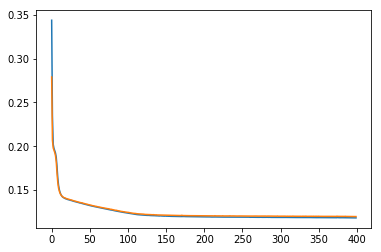

In [20]:
plt.plot(np.sqrt(autoencoder.history.history["loss"]))
plt.plot(np.sqrt(autoencoder.history.history["val_loss"]))

In [27]:
encoder = Model(input = input_dim, output = encoded)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out

C:\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


array([[ 2.444452 ,  9.69634  , 14.324214 ],
       [11.713678 ,  6.5342555, 14.015261 ],
       [15.831907 ,  7.4450884, 14.115524 ],
       ...,
       [11.685094 ,  6.536951 , 14.048253 ],
       [11.883583 ,  6.303102 , 15.88173  ],
       [19.618107 , 10.6613   , 17.093092 ]], dtype=float32)

TypeError: from_bounds() takes 4 positional arguments but 2158 were given

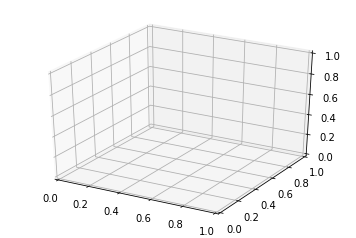

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Axes3D(encoded_out[:, 0],
       encoded_out[:, 1],
       encoded_out[:, 2])

In [39]:
encoded_out[:, 0]

array([ 2.444452, 11.713678, 15.831907, ..., 11.685094, 11.883583,
       19.618107], dtype=float32)

In [41]:
randrange(n, 23, 32)

array([24.71111148, 25.2440224 , 27.69006412, 31.33789571, 29.36094249,
       28.24685535, 30.21027326, 29.55117969, 29.6995944 , 31.70976003,
       28.28403887, 23.6159634 , 24.605549  , 25.55532248, 30.82706371,
       31.5969866 , 28.03672486, 28.35584215, 26.56653684, 30.70166829,
       24.92856346, 23.09874936, 30.20875254, 27.83256807, 28.29005834,
       31.36744864, 25.31939434, 30.85102976, 26.81464688, 23.30237766,
       24.65566311, 25.458762  , 29.58347741, 24.52832733, 26.82497676,
       28.98431971, 28.78987354, 31.13449662, 25.00219831, 23.05990501,
       31.92044928, 31.85861374, 27.47483995, 29.89390933, 26.88733816,
       25.79748099, 24.72315525, 27.02121641, 27.16401299, 27.5024072 ,
       31.50240496, 27.33198248, 25.28506705, 23.19225564, 31.69898238,
       26.00972847, 26.23573104, 25.71313052, 23.00527387, 30.2536026 ,
       25.3909404 , 23.55694838, 23.96275861, 27.37112676, 29.11746054,
       29.06313425, 30.10111568, 23.63827336, 28.89573833, 29.34

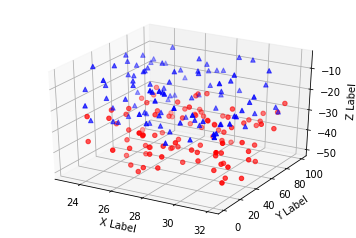

In [38]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def randrange(n, vmin, vmax):
    return (vmax-vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

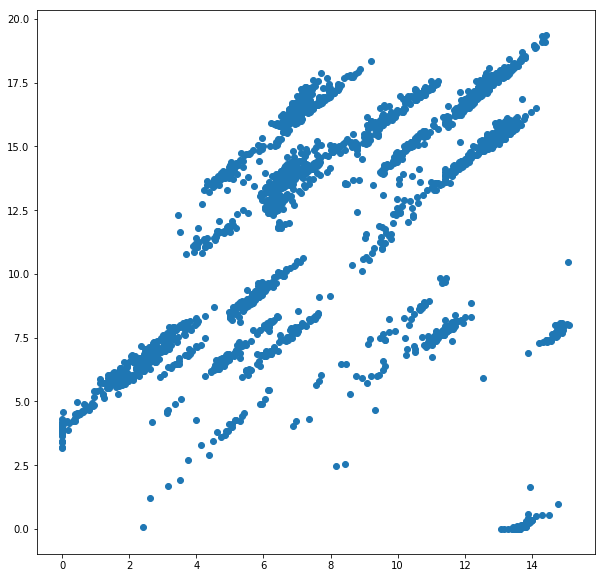

In [34]:
plt.figure(figsize=[10,10])
plt.scatter(encoded_out[:,0], encoded_out[:,2])

In [ ]:
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input = input_dim, output = encoded)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[0:2]
#array([[ 0.        ,  1.26510417,  1.62803197],
#       [ 2.32508397,  0.99735016,  2.06461048]], dtype=float32)